In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Descripción de los Datos
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)


# Importar Datos

In [32]:
data = pd.read_csv('')
data.head()

Netflows First_Protocol Second_Protocol Third_Protocol      p1_d      p2_d  \
0        82            TCP             UDP            NaN    2.9595  103.6315   
1       117            TCP             UDP            NaN   57.9530   64.0000   
2        94            TCP             UDP            NaN   13.0955  135.1670   
3         2            TCP             NaN            NaN  542.9590  542.9590   
4        23            TCP             UDP            NaN   74.7520  104.2040   

        p3_d   duration    max_d    min_d  ...  second_dp  third_dp  p1_ip  \
0  135.19425   6709.539  184.327    0.000  ...     5355.0      80.0    3.0   
1   90.11300   7092.561  148.642    0.000  ...     5355.0     123.0    2.0   
2  168.51400  10109.528  298.685    0.000  ...       80.0    1900.0    4.0   
3  542.95900   1085.918  542.959  542.959  ...    14444.0       NaN   17.0   
4  135.16800   2108.325  149.486    0.225  ...      443.0    1900.0    3.5   

   p2_ip  p3_ip    p1_ib   p2_ib    p3_ib      Type  Cryptocurrency  
0    5.0   5.75    84.00   160.0   248.00  not_mine   Does not have  
1    3.0   4.00    84.00    96.0   160.00  not_mine   Does not have  
2    4.0  11.75   128.00   184.0  2009.00  not_mine   Does not have  
3   17.0  17.00  1416.25  2152.5  2888.75      mine          Monero  
4    4.0   6.00    96.00   128.0   251.50  not_mine   Does not have  

[5 rows x 31 columns]

### Agrupación
Agrupación de las variables cuantitativas y categóricas por separado.

In [33]:
data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric = [c for c in data_numeric.index if data_numeric[c]]
data_object = [c for c in data_object.index if data_object[c]]

# Inspección Datos

### Variables Categoricas con respecto a la variable objetivo

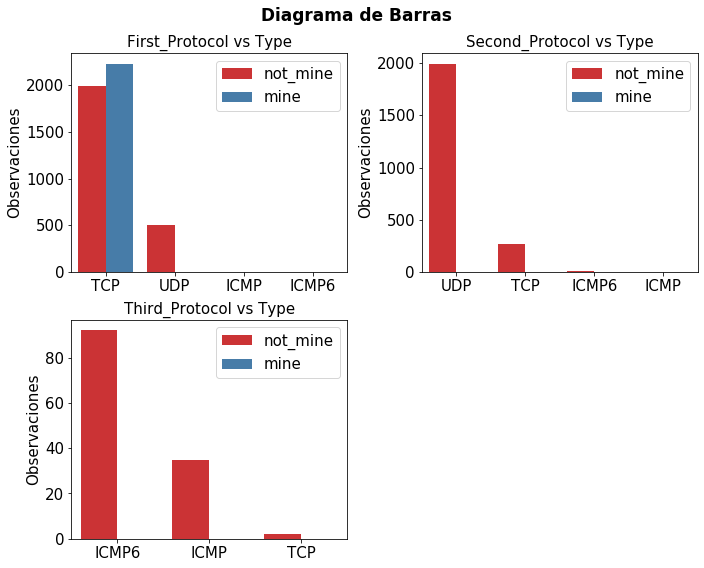

In [34]:
cruce = [('First_Protocol','Type'), ('Second_Protocol','Type'), ('Third_Protocol','Type')]
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
ax = ax.flat
for i, tupl in enumerate(cruce):
    sns.countplot(x = tupl[0], hue = tupl[1], data=data, palette="Set1", ax = ax[i])
    ax[i].set_title(tupl[0]+" vs "+tupl[1], size = 15)
    ax[i].tick_params(labelsize = 15)
    ax[i].set_ylabel("Observaciones",size = 15)
    ax[i].set_xlabel("")
    ax[i].legend(fontsize = 15)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Diagrama de Barras', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[3])

### Variables Cuantitativas con respecto a la variable objetivo

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


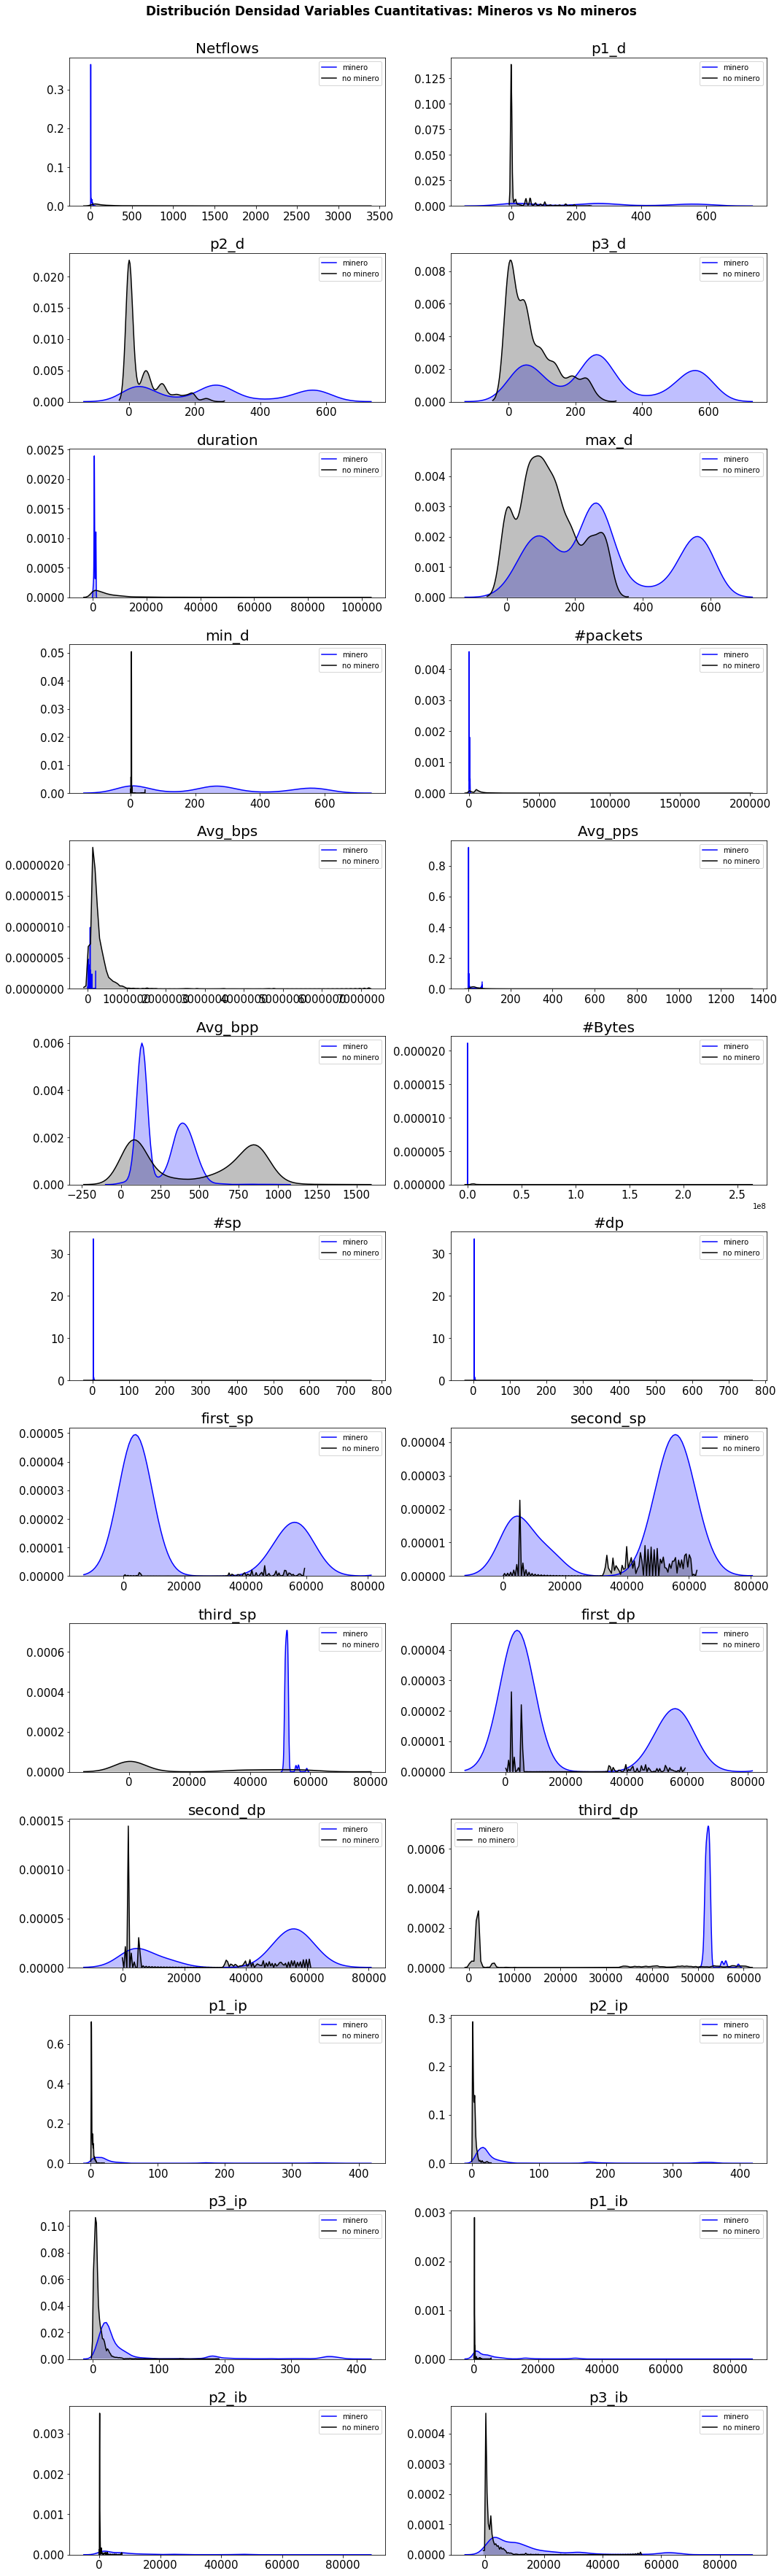

In [35]:
fig, ax = plt.subplots(nrows = 13, ncols = 2, figsize = (15,50))
ax = ax.flat

for i, col in enumerate(data_numeric):
    sns.kdeplot(data[data['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i], label="minero")
    sns.kdeplot(data[data['Type'] == 'not_mine'][col], color='black', shade=True, ax = ax[i], label="no minero")    
    ax[i].set_title(col, size = 20)
    ax[i].tick_params(labelsize = 15)
    ax[i].set_xlabel("", size=15)
    ax[i].legend()

fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Mineros vs No mineros', fontsize = 17, fontweight = "bold");

In [36]:
informe_asimetria_kurtosis = pd.DataFrame(columns = data_numeric, index = ['Coeficiente_Asimetria','Coeficiente_Curtosis'])
for i in data_numeric:
    temp = []
    temp.append(data[data['Type'] == 'not_mine'][i].skew())
    temp.append(data[data['Type'] == 'not_mine'][i].kurt())
    informe_asimetria_kurtosis[i] = temp
informe_asimetria_kurtosis.T

Coeficiente_Asimetria  Coeficiente_Curtosis
Netflows                4.248662             33.162797
p1_d                    2.567655              6.618840
p2_d                    1.540386              1.540159
p3_d                    0.967565             -0.089288
duration                3.645414             18.404449
max_d                   0.370866             -0.804083
min_d                  34.329753           1478.976833
#packets               10.795206            181.648993
Avg_bps                10.608738            194.428202
Avg_pps                12.919383            300.494431
Avg_bpp                -0.023682             -1.758733
#Bytes                 15.524971            342.158700
#sp                     3.218724             15.768768
#dp                     3.245260             15.793740
first_sp                8.923826             79.289955
second_sp               2.833611              6.362090
third_sp                0.905542             -0.982882
first_dp                8.361588             70.509341
second_dp               3.037186              7.634301
third_dp                2.160912              2.962102
p1_ip                   2.971134             13.899106
p2_ip                   3.038571             11.907018
p3_ip                   6.607574             81.863731
p1_ib                  12.589250            236.561753
p2_ib                   5.759243             40.714941
p3_ib                   6.804097             97.742039

In [37]:
informe_asimetria_kurtosis = pd.DataFrame(columns = data_numeric, index = ['Coeficiente_Asimetria','Coeficiente_Curtosis'])
for i in data_numeric:
    temp = []
    temp.append(data[data['Type'] == 'mine'][i].skew())
    temp.append(data[data['Type'] == 'mine'][i].kurt())
    informe_asimetria_kurtosis[i] = temp
informe_asimetria_kurtosis.T

Coeficiente_Asimetria  Coeficiente_Curtosis
Netflows                2.409473              6.576000
p1_d                    0.226786             -1.280576
p2_d                    0.249586             -1.239100
p3_d                    0.289447             -1.185580
duration                0.277370             -0.757692
max_d                   0.373526             -1.108748
min_d                   0.208755             -1.290224
#packets                1.064497              0.148380
Avg_bps                25.578585            790.641159
Avg_pps                15.641513            258.083040
Avg_bpp                 0.528050             -0.649922
#Bytes                  1.010648              0.586074
#sp                     3.757265             24.990443
#dp                     3.715461             24.802619
first_sp                0.834124             -1.274578
second_sp              -0.798974             -1.225202
third_sp                3.856001             18.558216
first_dp                0.694172             -1.493433
second_dp              -0.674483             -1.418131
third_dp                3.832042             18.487427
p1_ip                   2.346697              4.228485
p2_ip                   2.337475              4.200594
p3_ip                   2.279667              4.011593
p1_ib                   2.739505             10.981377
p2_ib                   2.077345              4.224018
p3_ib                   1.916464              3.162295

In [38]:
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), data_numeric),
], remainder='passthrough')

In [39]:
value = preprocessor.fit_transform(data[data_numeric])
value

array([[-0.08478692, -0.68540958, -0.24470927, ..., -0.4171446 ,
        -0.47609459, -0.55869393],
       [ 0.09792905, -0.3966615 , -0.4587796 , ..., -0.4171446 ,
        -0.48255709, -0.56545917],
       [-0.02214144, -0.63218965, -0.07436965, ..., -0.41066924,
        -0.47367115, -0.42331227],
       ...,
       [ 2.03993881, -0.70094869, -0.80447685, ..., -0.4247973 ,
        -0.48901959, -0.56822677],
       [-0.50764388,  2.4109369 ,  2.39686337, ..., 10.59508937,
         7.07210498,  5.181304  ],
       [-0.34580973, -0.70094869, -0.80446875, ..., -0.42192754,
        -0.48255709, -0.56691985]])

In [43]:
data_estandarizada = pd.DataFrame(value,columns=data_numeric)
data_estandarizada.head()

Netflows      p1_d      p2_d      p3_d  duration     max_d     min_d  \
0 -0.084787 -0.685410 -0.244709 -0.196223  0.361252 -0.132463 -0.625504   
1  0.097929 -0.396662 -0.458780 -0.451115  0.409764 -0.352407 -0.625504   
2 -0.022141 -0.632190 -0.074370 -0.007831  0.791878  0.572379 -0.625504   
3 -0.502423  2.149904  2.128327  2.109300 -0.351008  2.077954  2.160192   
4 -0.392794 -0.308457 -0.241617 -0.196371 -0.221515 -0.347205 -0.624349   

   #packets   Avg_bps   Avg_pps  ...  third_sp  first_dp  second_dp  third_dp  \
0 -0.317443 -0.359303 -0.336093  ...  1.944207 -0.507971  -0.602456 -0.500116   
1 -0.309740 -0.359148 -0.308138  ... -0.729148 -0.507971  -0.602456 -0.497808   
2  0.899656  0.216184  0.446664  ...  1.280920 -0.507971  -0.808111 -0.402429   
3 -0.369684 -0.364646 -0.392005  ...       NaN  2.003176  -0.248105       NaN   
4 -0.357079 -0.361408 -0.392005  ...  0.680320 -0.525970  -0.793959 -0.402429   

      p1_ip     p2_ip     p3_ip     p1_ib     p2_ib     p3_ib  
0 -0.338855 -0.343648 -0.398552 -0.417145 -0.476095 -0.558694  
1 -0.353723 -0.372665 -0.423315 -0.417145 -0.482557 -0.565459  
2 -0.323986 -0.358157 -0.313647 -0.410669 -0.473671 -0.423312  
3 -0.130696 -0.169549 -0.239356 -0.221081 -0.274899 -0.355679  
4 -0.331420 -0.358157 -0.395014 -0.415379 -0.479326 -0.558425  

[5 rows x 26 columns]

In [44]:
data_estandarizada = pd.concat([data_estandarizada,data['Type']],axis=1)
data_estandarizada.head()

Netflows      p1_d      p2_d      p3_d  duration     max_d     min_d  \
0 -0.084787 -0.685410 -0.244709 -0.196223  0.361252 -0.132463 -0.625504   
1  0.097929 -0.396662 -0.458780 -0.451115  0.409764 -0.352407 -0.625504   
2 -0.022141 -0.632190 -0.074370 -0.007831  0.791878  0.572379 -0.625504   
3 -0.502423  2.149904  2.128327  2.109300 -0.351008  2.077954  2.160192   
4 -0.392794 -0.308457 -0.241617 -0.196371 -0.221515 -0.347205 -0.624349   

   #packets   Avg_bps   Avg_pps  ...  first_dp  second_dp  third_dp     p1_ip  \
0 -0.317443 -0.359303 -0.336093  ... -0.507971  -0.602456 -0.500116 -0.338855   
1 -0.309740 -0.359148 -0.308138  ... -0.507971  -0.602456 -0.497808 -0.353723   
2  0.899656  0.216184  0.446664  ... -0.507971  -0.808111 -0.402429 -0.323986   
3 -0.369684 -0.364646 -0.392005  ...  2.003176  -0.248105       NaN -0.130696   
4 -0.357079 -0.361408 -0.392005  ... -0.525970  -0.793959 -0.402429 -0.331420   

      p2_ip     p3_ip     p1_ib     p2_ib     p3_ib      Type  
0 -0.343648 -0.398552 -0.417145 -0.476095 -0.558694  not_mine  
1 -0.372665 -0.423315 -0.417145 -0.482557 -0.565459  not_mine  
2 -0.358157 -0.313647 -0.410669 -0.473671 -0.423312  not_mine  
3 -0.169549 -0.239356 -0.221081 -0.274899 -0.355679      mine  
4 -0.358157 -0.395014 -0.415379 -0.479326 -0.558425  not_mine  

[5 rows x 27 columns]

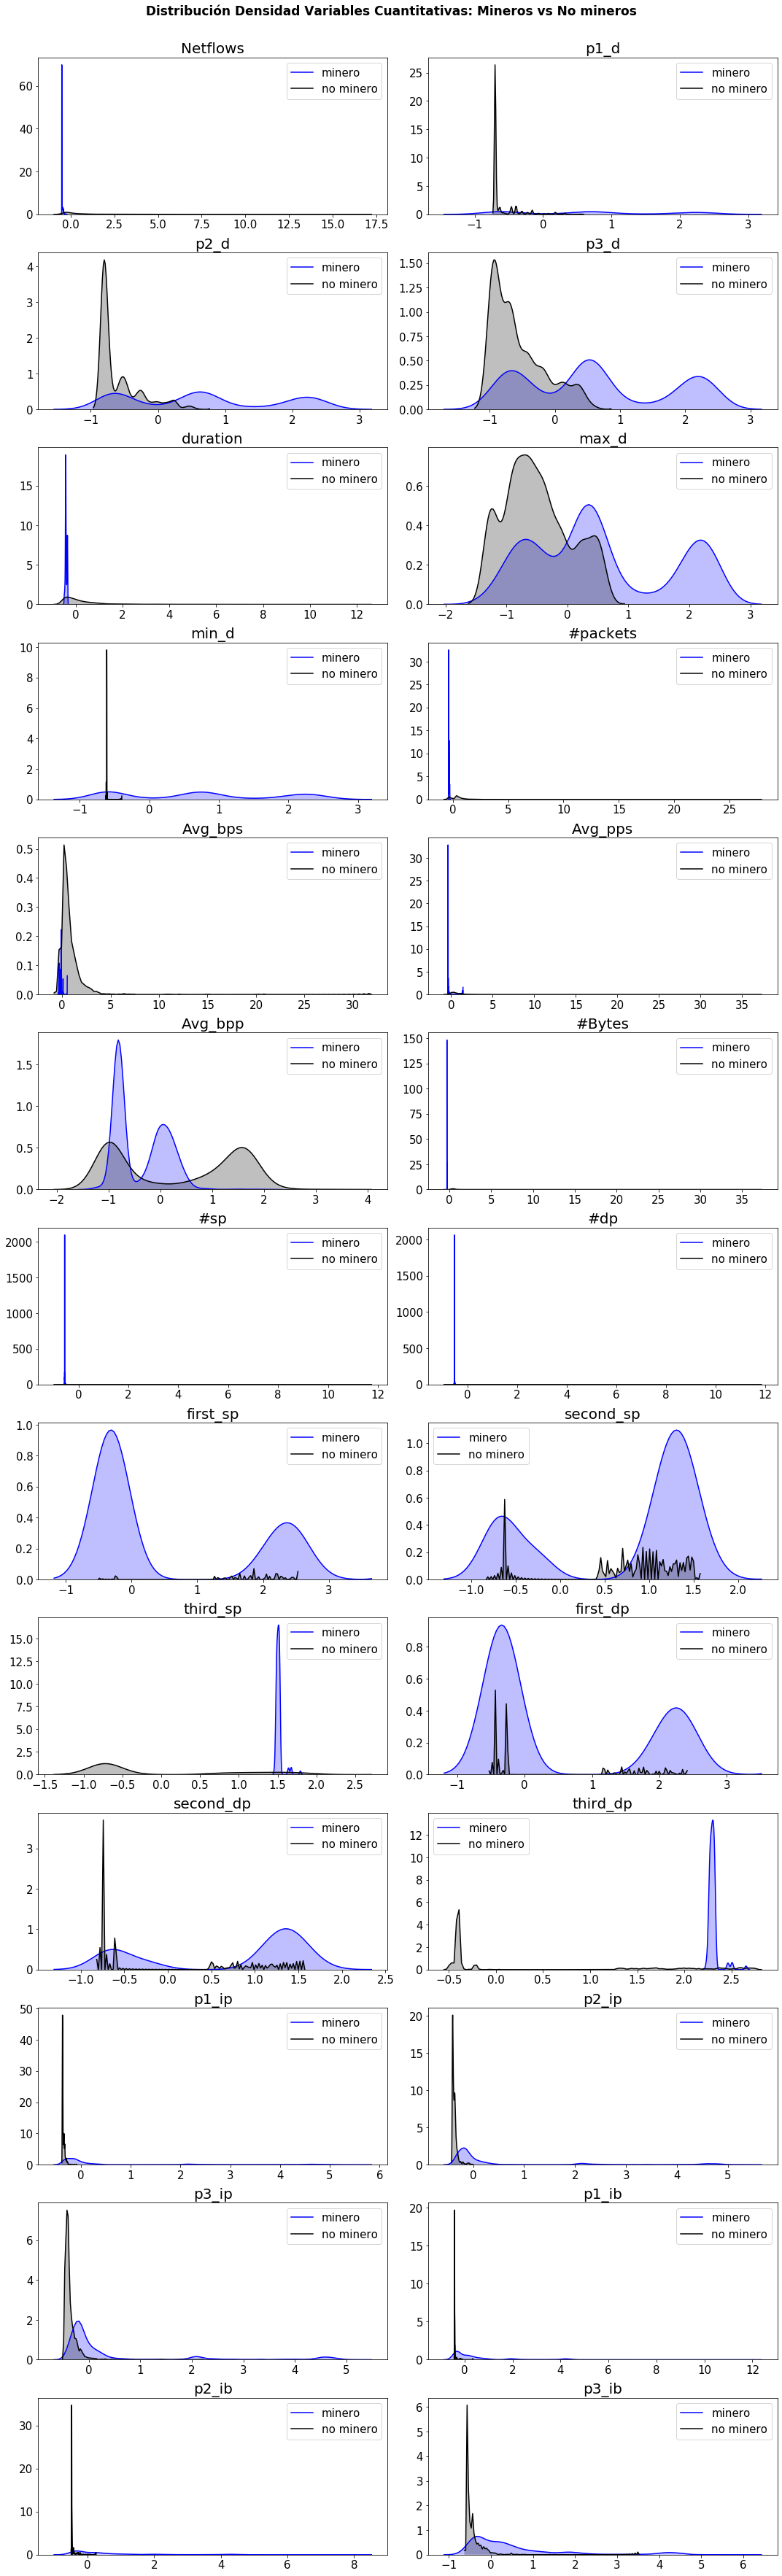

In [47]:
fig, ax = plt.subplots(nrows = 13, ncols = 2, figsize = (15,50))
ax = ax.flat

data_estandarizada_numeric = data_estandarizada.select_dtypes(['int64','float64']).columns
for i, col in enumerate(data_estandarizada_numeric):
    sns.kdeplot(data_estandarizada[data_estandarizada['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i], label="minero")
    sns.kdeplot(data_estandarizada[data_estandarizada['Type'] == 'not_mine'][col], color='black', shade=True, ax = ax[i], label="no minero")    
    ax[i].set_title(col, size = 20)
    ax[i].tick_params(labelsize = 15)
    ax[i].set_xlabel("", size=15)
    ax[i].legend(fontsize = 15)

fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Mineros vs No mineros', fontsize = 17, fontweight = "bold");

In [48]:
data_n = pd.concat([data[data_numeric], data['Type']], axis = 1)
data_n.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


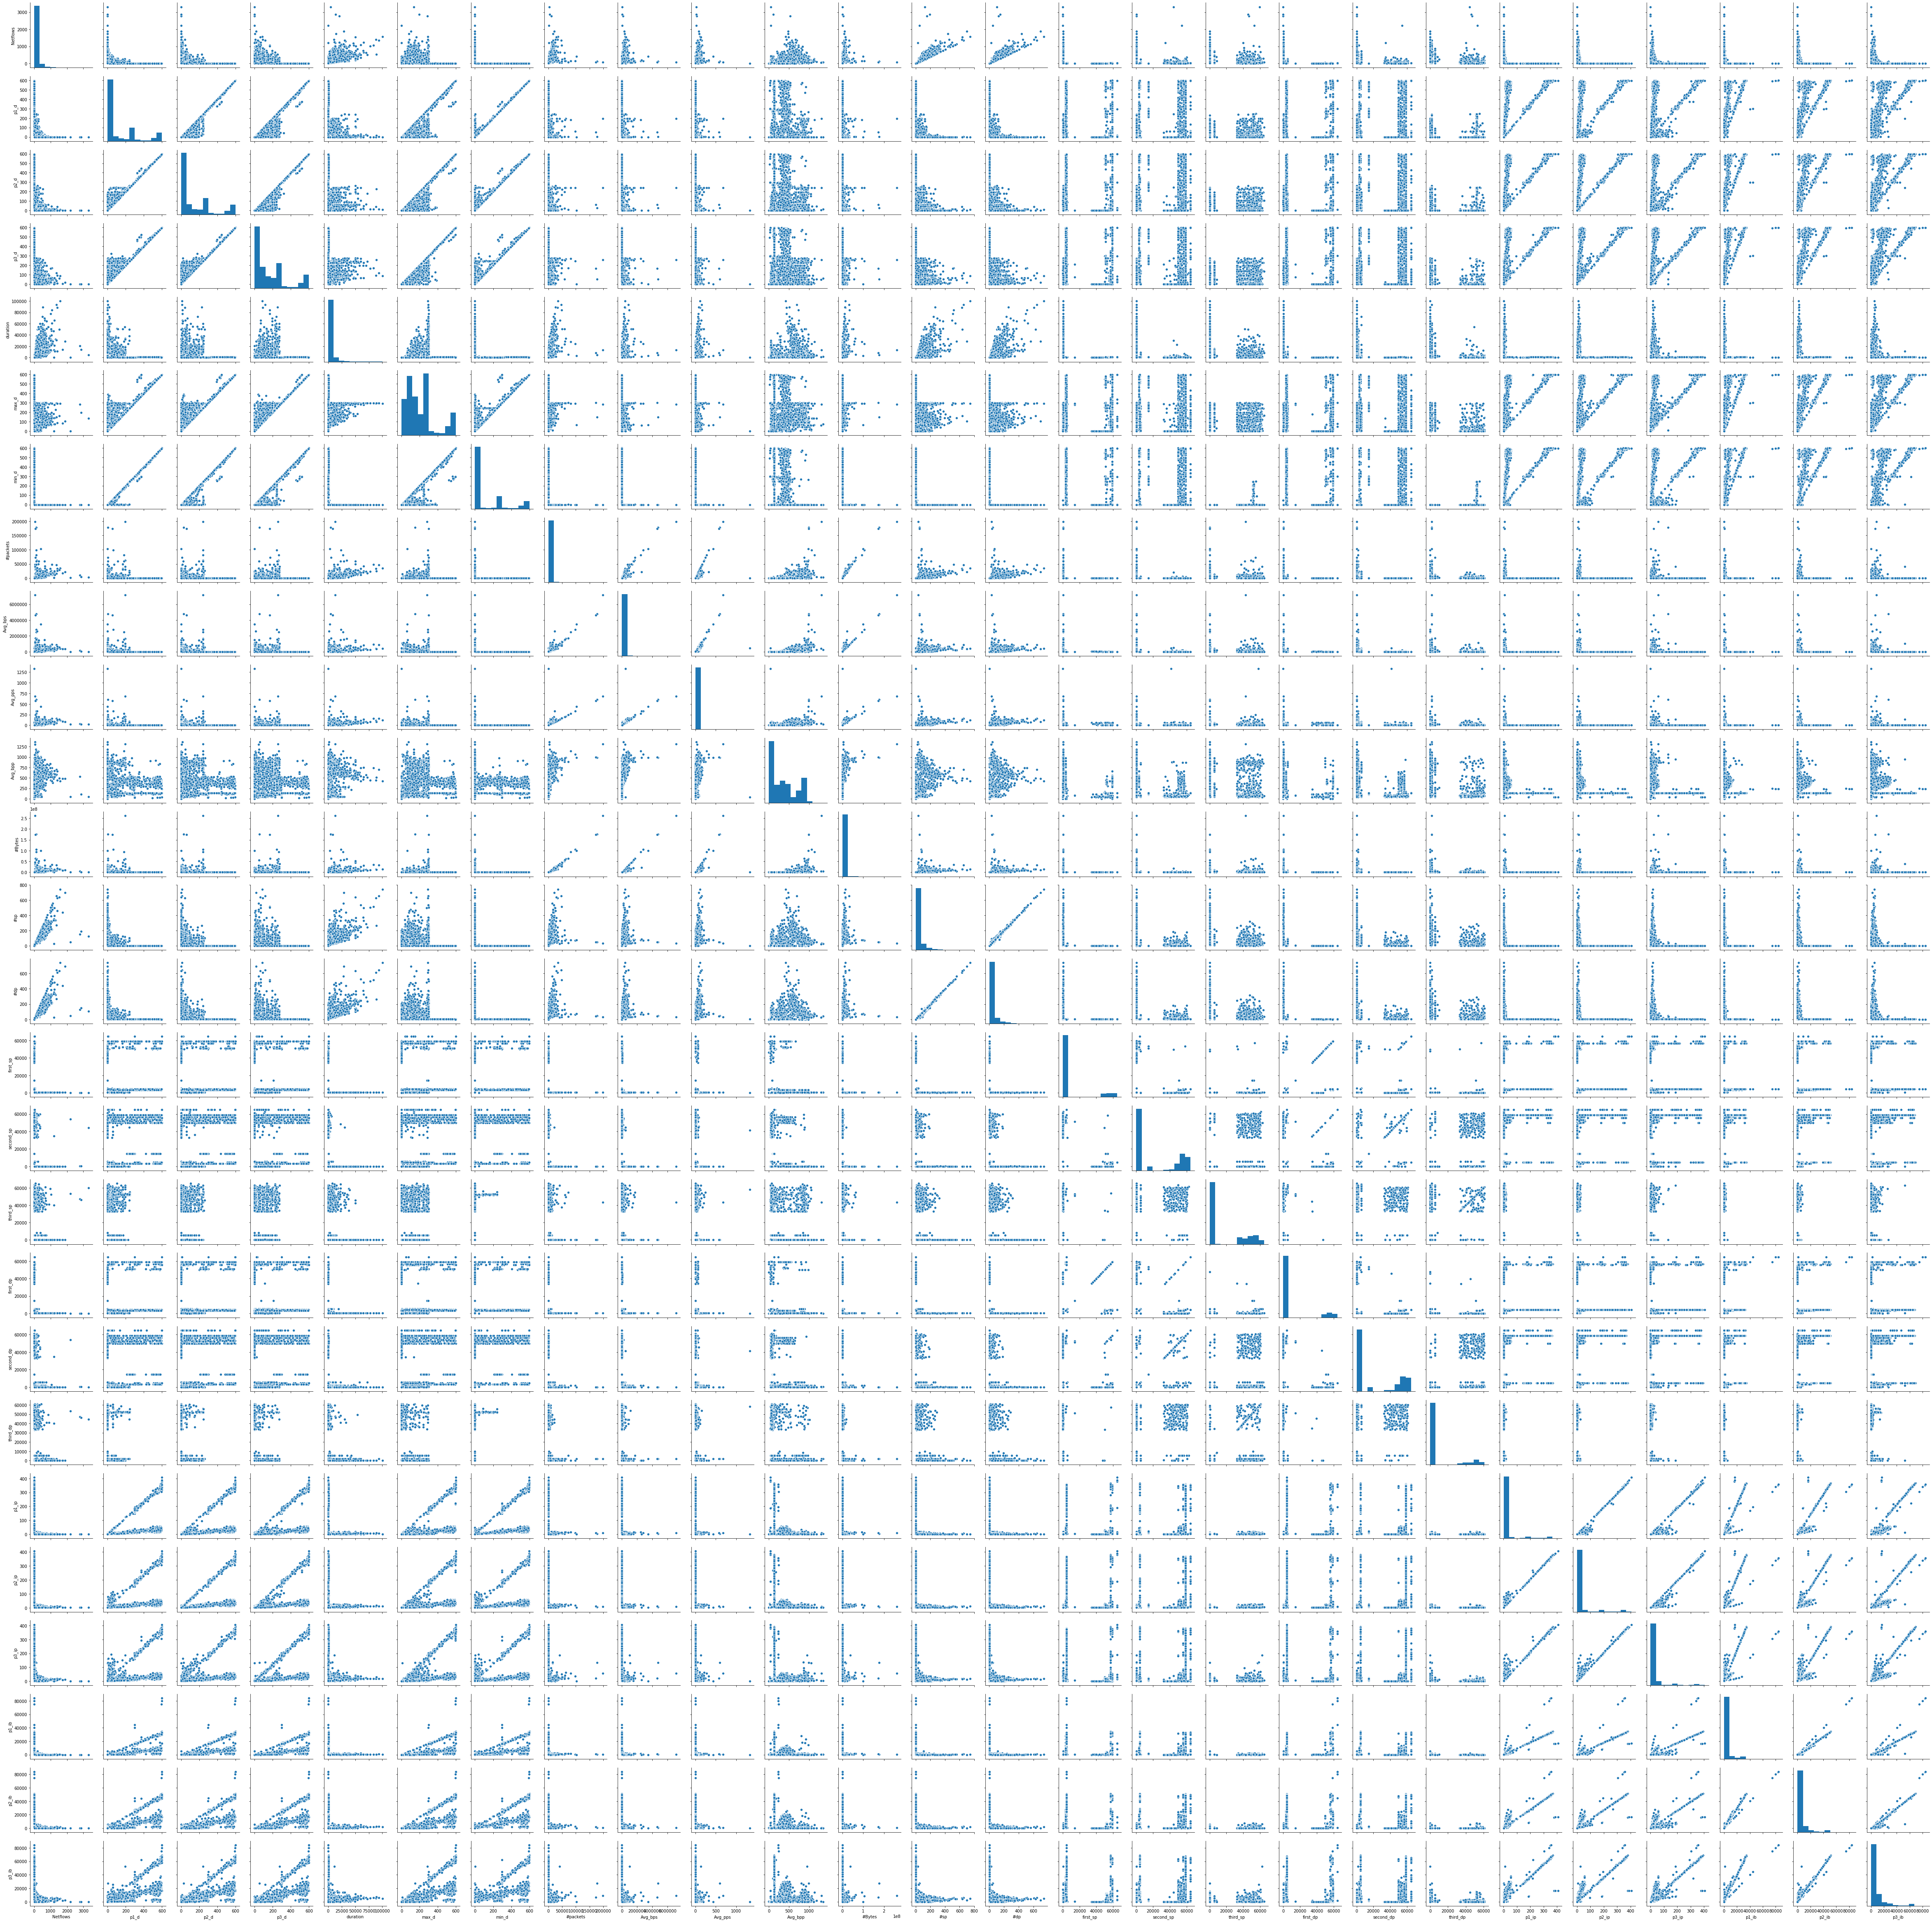

In [50]:
sns.pairplot(data_n)

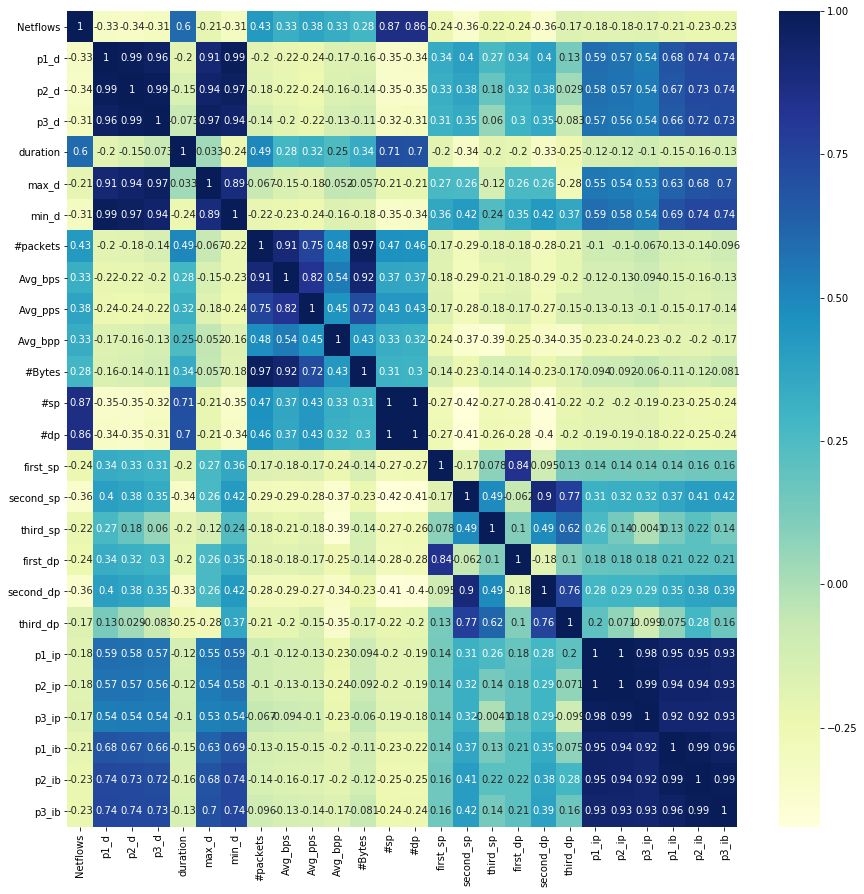

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")